In [1]:
# Imports
#---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import matplotlib as mpl
from datetime import timezone

register_matplotlib_converters()

# File locations
#----------------
data_home = './oxaria/raw/1oxaria/json/gap_filling/batch_3_jun21_oct21/'
pngs = './oxaria/pngs/gap_filling/'

In [2]:
# Load the df 
#-------------
oxaria1_status = pd.read_feather(data_home+'oxaria1_status_gf_oct.ftr').set_index(['tag','rec'])
oxaria1_status_lt = oxaria1_status.iloc[:,[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,30]]
del oxaria1_status

# Checking out the data types 
#-----------------------------
oxaria1_status_lt.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1181794 entries, ('scs-bgx-536', Timestamp('2021-06-01 00:00:39+0000', tz='UTC')) to ('scs-bgx-543', Timestamp('2021-09-30 23:59:31+0000', tz='UTC'))
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   val.gps.pos:0      1141785 non-null  float32
 1   val.gps.pos:1      1141785 non-null  float32
 2   val.gps.elv        1141785 non-null  float32
 3   val.gps.qual       1119345 non-null  float32
 4   val.up.load.av15   1181794 non-null  float32
 5   val.up.load.av1    1181794 non-null  float32
 6   val.up.load.av5    1181794 non-null  float32
 7   val.up.period      1181794 non-null  object 
 8   val.up.users       1181794 non-null  float32
 9   val.psu.prot-batt  1181794 non-null  float32
 10  val.psu.rst        1181794 non-null  object 
 11  val.psu.standby    1181794 non-null  bool   
 12  val.psu.src        1181794 non-null  object 
 13  val.psu.in  

In [3]:
# Some cleaning incase have missed anything
#-------------------------------------------
oxaria1_status_lt = oxaria1_status_lt[~oxaria1_status_lt.index.duplicated(keep='last')].reset_index()
oxaria1_status_lt = oxaria1_status_lt.dropna(axis=0,subset=['tag']).set_index(['tag','rec']).sort_index()

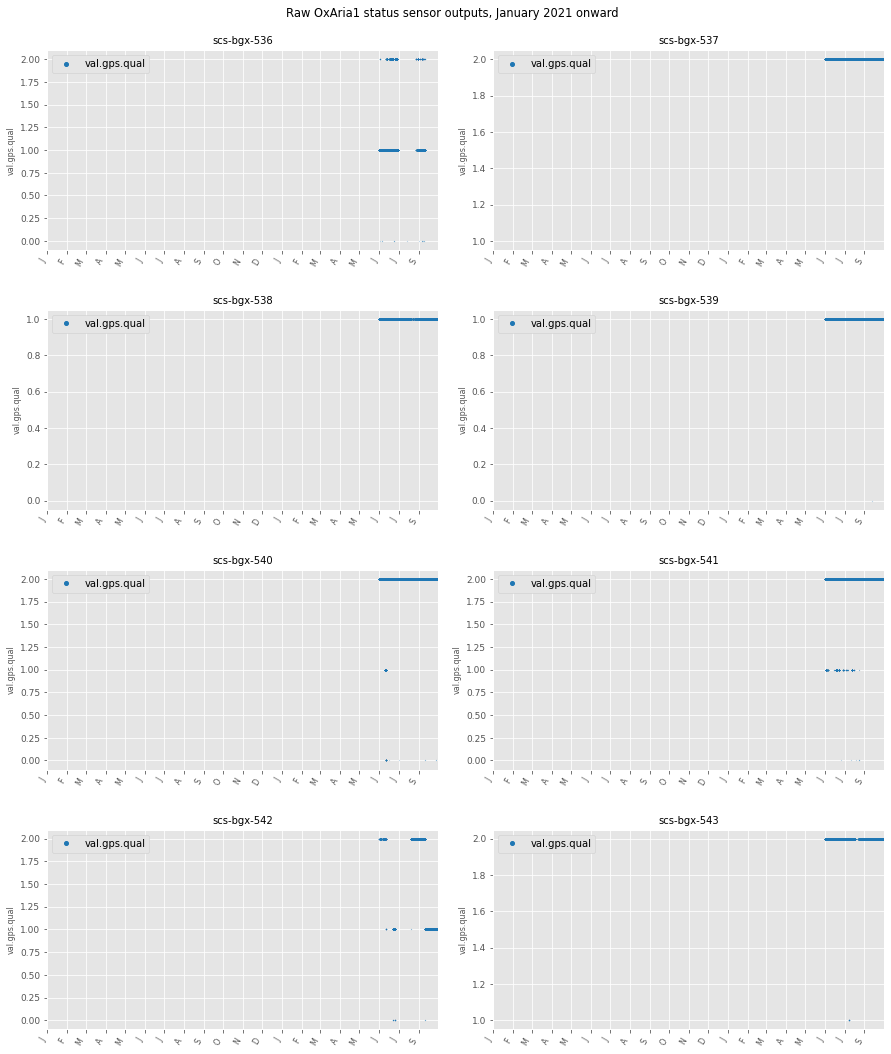

In [4]:
# Check on the outliers & start-ups in the original dataset
# ----------------------------------------------------------
plt.style.use('ggplot')
x_ticks = pd.date_range('2020-01-01', periods=20, freq='MS')
x_labels = [
    'J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M',
    'A', 'M', 'J', 'J', 'S'
]

myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,9,1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False,
                         sharey=False, figsize=(15, 20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria1 status sensor outputs, January 2021 onward', fontsize=11.5, y=0.91)

for tag, dat in oxaria1_status_lt.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    dat.plot(y='val.gps.qual', c='tab:blue',linewidth=0.5, marker='o', ms=0.1, ls='', label='val.gps.qual', ax=ax, legend=True, \
            zorder=1)
    ax.set_title(tag, fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=60,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', length=0)
    ax.set_xlabel('')
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('val.gps.qual', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.14, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper left') 
    
plt.show()    
    
for ax in axes_list:
    ax.remove()

In [5]:
# Save the df 
#-------------

# There don't seem to be any outages that need removing so just saving
oxaria1_status_lt.reset_index().to_feather(data_home+'oxaria1_status_stable_oct21.ftr')